In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# number of query variables
dict_number_query_variables = {
1: 5 +  3,
2: 5 +  3,
3: 4 +  2,
4: 5 +  3,
5: 5 +  3,
6: 5 +  3,
7: 8 +  4,
8: 7 +  4,
9: 8 +  5,
10: 7 +  5,
11: 8 +  5,
12: 8 +  5,
13: 9 +  6,
14: 8 +  5,
15: 9 +  5,
16: 8 +  4,
17: 7 +  4,
18: 7 +  4,
19: 10 +  6,
20: 10 +  7,
21: 9 +  5,
22: 11 +  7,
23: 11 +  7,
24: 12 +  7,
25: 9 +  5,
26: 12 +  8,
27: 12 +  7,
28: 14 +  9,
29: 12 +  7,
30: 6 +  4
}

In [11]:
df_elemental_shannon = pd.read_csv("../results/estimation_time/runtimes_elemental_shannon_lpbound_agg.csv")
df_lpbound_acyclic = pd.read_csv("../results/estimation_time/runtimes_optimized_lpbound.txt")
df_flowbound = pd.read_csv("../results/estimation_time/flow_bound_timing_results.csv")
df_flowbound.rename(columns={"query": "query_id", "objective": "objective_value"}, inplace=True)

df_elemental_shannon = df_elemental_shannon.groupby("query_id")[["build_time", "solve_time", "objective_value"]].mean().reset_index()
df_elemental_shannon["method"] = "Elemental Shannon"

df_lpbound_acyclic = df_lpbound_acyclic.groupby("query_id")[["build_time", "solve_time", "objective_value"]].mean().reset_index()
df_lpbound_acyclic["method"] = "LpBound Acyclic"
df_flowbound = df_flowbound.groupby("query_id")[["build_time", "solve_time", "objective_value"]].mean().reset_index()
df_flowbound["method"] = "FlowBound"

df = pd.concat([df_elemental_shannon, df_lpbound_acyclic, df_flowbound])
df["number_query_variables"] = df["query_id"].map(dict_number_query_variables)


In [12]:
dict_renaming = {
    "LpBound Acyclic": r"$\text{LP}_{\text{Berge}}$",
    "Elemental Shannon": r"$\text{LP}_{\text{base}}$",
    "FlowBound": r"$\text{LP}_{\text{flow}}$",
}

query_ids = list(range(19, 31)) + [13]
# remove 21
query_ids.remove(21)
query_ids.remove(25)

df["method"] = df["method"].map(dict_renaming)
df_base_19_30 = pd.DataFrame({
    "query_id": query_ids,
    "method": [r"$\text{LP}_{\text{base}}$"] * len(query_ids),
    "number_query_variables": [dict_number_query_variables[i] for i in query_ids],
    "solve_time": [10**6*10**6] * len(query_ids),
    "build_time": [0] * len(query_ids),
    "objective_value": [0] * len(query_ids)
})
df = df[~((df['number_query_variables'] == 15) & (df['method'] == r"$\text{LP}_{\text{base}}$"))]
df = pd.concat([df, df_base_19_30])
df = df[df['number_query_variables'] != 10]

# order:
order_ = [r"$\text{LP}_{\text{base}}$", r"$\text{LP}_{\text{flow}}$", r"$\text{LP}_{\text{Berge}}$"]
df["method"] = pd.Categorical(df["method"], categories=order_, ordered=True)
 
df

,query_id,build_time,solve_time,objective_value,method,number_query_variables
0,1,1918107.0,5.707735e+07,22.8805,$\text{LP}_{\text{base}}$,8.0
1,2,1528594.0,7.051796e+07,25.8721,$\text{LP}_{\text{base}}$,8.0
2,3,315892.3,3.872477e+06,28.5034,$\text{LP}_{\text{base}}$,6.0
3,4,1607140.0,7.336300e+07,23.8274,$\text{LP}_{\text{base}}$,8.0
4,5,1541456.0,6.960322e+07,26.4106,$\text{LP}_{\text{base}}$,8.0
...,...,...,...,...,...,...
5,26,0.0,1.000000e+12,0.0000,$\text{LP}_{\text{base}}$,20.0
6,27,0.0,1.000000e+12,0.0000,$\text{LP}_{\text{base}}$,19.0
7,28,0.0,1.000000e+12,0.0000,$\text{LP}_{\text{base}}$,23.0
8,29,0.0,1.000000e+12,0.0000,$\text{LP}_{\text{base}}$,19.0


In [13]:
df_plot = df.melt(id_vars=["query_id", "method", "number_query_variables"], value_vars=["build_time", "solve_time", "objective_value"])
# drop rows where value is NaN in number_query_variables
df_plot = df_plot.dropna(subset=["number_query_variables"])
# convert number of query variables to int
df_plot["number_query_variables"] = df_plot["number_query_variables"].astype(int)

df = df_plot[df_plot['variable'].isin(['build_time', 'solve_time'])]

df["value"] = df["value"] / 1_000_000

/tmp/ipykernel_902898/1903402003.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["value"] = df["value"] / 1_000_000


In [14]:
df['color'] = ''

# Assign colors based on the conditions
df.loc[(df['method'] == r"$\text{LP}_{\text{flow}}$") & (df['variable'] == 'build_time'), 'color'] = '#519E3E'
df.loc[(df['method'] == r"$\text{LP}_{\text{flow}}$") & (df['variable'] == 'solve_time'), 'color'] = '#C53A32'
df.loc[(df['method'] == r"$\text{LP}_{\text{Berge}}$") & (df['variable'] == 'build_time'), 'color'] = '#8D69B8'
df.loc[(df['method'] == r"$\text{LP}_{\text{Berge}}$") & (df['variable'] == 'solve_time'), 'color'] = '#84584E'
df.loc[(~ df['query_id'].isin(query_ids)) & (df['method'] == r"$\text{LP}_{\text{base}}$") & (df['variable'] == 'build_time'), 'color'] = '#1D70AA'
df.loc[(~ df['query_id'].isin(query_ids)) & (df['method'] == r"$\text{LP}_{\text{base}}$") & (df['variable'] == 'solve_time'), 'color'] = '#EF8636'
df.loc[df['query_id'].isin(query_ids) & (df['method'] == r"$\text{LP}_{\text{base}}$") & (df['variable'] == 'solve_time'), 'color'] = '#D4D0D9'
df.loc[df['query_id'].isin(query_ids) & (df['method'] == r"$\text{LP}_{\text{base}}$") & (df['variable'] == 'build_time'), 'color'] = '#D4D0D9'

#df.loc[(df['query_id'] == 13) & (df['method'] == r"$\text{LP}_{\text{base}}$") & (df['variable'] == 'solve_time'), 'color'] = '#D4D0D9'
#df.loc[(df['query_id'] == 13) & (df['method'] == r"$\text{LP}_{\text{base}}$") & (df['variable'] == 'build_time'), 'color'] = '#D4D0D9'


/tmp/ipykernel_902898/4002466215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = ''


/tmp/ipykernel_902898/3568683416.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"query": "query_id"}, inplace=True)


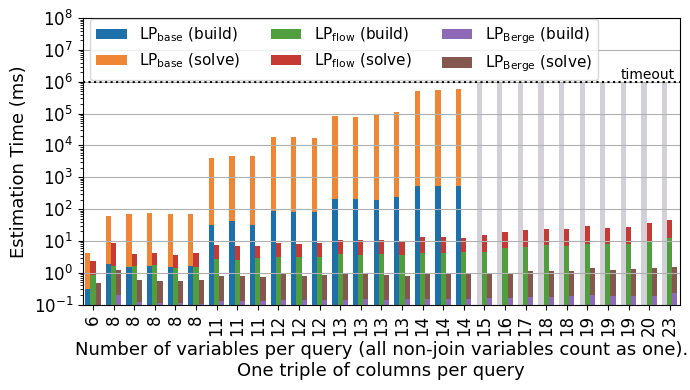

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
df.rename(columns={"query": "query_id"}, inplace=True)

df_sorted = df.sort_values(['number_query_variables', 'query_id', 'method', 'variable'])

# Get unique query_ids, methods, and variables
query_ids = df_sorted['query_id'].unique()
methods = df_sorted['method'].unique()
variables = df_sorted['variable'].unique()

# Set up the plot
fig, ax = plt.subplots(figsize=(7, 4))
ax.xaxis.grid(False)
ax.yaxis.grid(True)

# Set the width of each bar and the spacing between groups
bar_width = 0.5
group_spacing = 0.5

# Create x-coordinates for each group of bars
x = np.arange(len(query_ids)) * (len(methods) * bar_width + group_spacing)

# Plot stacked bars for each method and variable
for i, method in enumerate(methods):
    bottom = np.zeros(len(query_ids))
    for variable in variables:
        heights = []
        colors = []
        for query_id in query_ids:
            data = df_sorted[(df_sorted['query_id'] == query_id) & 
                             (df_sorted['method'] == method) & 
                             (df_sorted['variable'] == variable)]
            value = data['value'].values
            color = data['color'].values
            heights.append(value[0] if len(value) > 0 else 0)
            colors.append(color[0] if len(color) > 0 else 'gray')  # Use 'gray' as default if no color is specified

        # Change the label format to method (variable)
        label = f'{method} ({variable.replace("_time", "")})'
        if method == 'build':
            label = f'Elemental ({variable.replace("_time", "")})'

        ax.bar(x + i * bar_width, heights, bar_width, bottom=bottom, label=label, color=colors)
        bottom += heights

# Customize the plot
ax.set_ylabel('Estimation Time (ms)', fontsize=13)
ax.set_xlabel("Number of variables per query (all non-join variables count as one).\nOne triple of columns per query", fontsize=13)
ax.set_yscale('log')

# Set x-ticks and labels
ax.set_xticks(x + bar_width * (len(methods) - 1) / 2)
x_labels = [f'{nr}' for qid, nr in zip(query_ids, 
                                       df_sorted.drop_duplicates('query_id')['number_query_variables'])]
ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=12)

# y tick labels font size
plt.yticks(fontsize=12)

# Adjust legend
handles, labels = ax.get_legend_handles_labels()
# place legend a little bit to higher 
ax.legend(handles, labels, loc='upper left', fontsize=11, ncol=3, frameon=True, bbox_to_anchor=(0.0, 1.022))

# Add a title
plt.title('Runtime Comparison by Query and Method', fontsize=14)
plt.title("")

# x lim 
plt.xlim(-0.5, len(query_ids) * (len(methods) * bar_width + group_spacing) - 0.5)

# y lim 
plt.ylim(0.1, 10**8)

# add a vertical line at 10**6, dotted and annotate it with "timeout"
plt.axhline(y=10**6, color='black', linestyle='dotted')
plt.text(57, 10**6, "timeout", fontsize=10, va='bottom', ha='right')

# rotate the x-axis labels
plt.xticks(rotation=90)

# Adjust layout and display the plot
plt.tight_layout()

# export as eps in high quality
#plt.savefig("inference_runtime_comparison.eps", format="eps", dpi=800)

plt.show()